number of nodes of G0: 6394
number of nodes of G0: 5098
# of partitions for Louvain modularity = 27
The target protein YAP1802 belongs to community # 4
Position of YAP1802: [ 0.05715744 -0.19948693]
[('4932.YBL037W', 805.9220709979626), ('4932.YBL047C', 598.1523249283284), ('4932.YOL062C', 515.2434139754622), ('4932.YNL084C', 475.4460343990216), ('4932.YGR167W', 448.1675460491524)]
[('4932.YBL037W', 0.14414414414414414), ('4932.YPR029C', 0.12612612612612611), ('4932.YBL047C', 0.12612612612612611), ('4932.YHR114W', 0.11711711711711711), ('4932.YPR049C', 0.10810810810810811)]
Subgraph centrality rank: 6
Degree centrality rank: 15
YAP1802 degree: 8
Max degree: [('4932.YBL037W', 16)]
['4932.YNL106C', '4932.YBL047C', '4932.YGR241C']
['4932.YBL037W', '4932.YBL047C', '4932.YGR241C', '4932.YGR167W', '4932.YOL062C']
['4932.YBL037W', '4932.YBL047C', '4932.YGR241C', '4932.YLR206W']
['4932.YBL037W', '4932.YBL047C', '4932.YGR241C', '4932.YDL161W']
['4932.YBL037W', '4932.YNL084C', '4932.YGR241C', '4

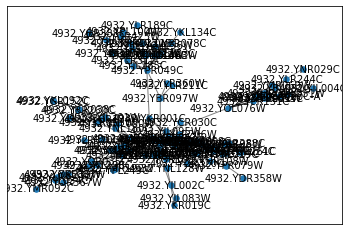

In [1]:
# one needs to import those packages which are needed; best to be done at the beginning of the program.
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import numpy as np
import scipy as sp
from string import ascii_lowercase 
import csv
# some basic settings for plotting figures
import matplotlib.pyplot as plt
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}

plt.rc('font', **font)
G0 = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str) #Delete the header first or this might not work!

print('number of nodes of G0:',G0.number_of_nodes())
#Remove the essential proteins from G0
with open("essential_yeast.csv") as f:
    essential = csv.reader(f)
    for row in essential:
        if "4932."+row[1] in G0.nodes:
            G0.remove_node("4932."+row[1])
print('number of nodes of G0:',G0.number_of_nodes())

# delete those edges with a combined score of <= threshold_score (small confidence)
threshold_score = 950
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])
#Get largest connected component
largest_cc = max(nx.connected_components(G0),key=len)
G0 = G0.subgraph(largest_cc)
#Find partition of YAP1802
partition = community_louvain.best_partition(G0)
number_of_communities = max(list(partition.values()))+1
print('# of partitions for Louvain modularity =',number_of_communities)
node_target = "4932.YGR241C"
print('The target protein YAP1802 belongs to community #',partition[node_target])
target_partition = []
for node in partition:
    if partition[node] == partition[node_target]:
        target_partition.append(node)
H = G0.subgraph(target_partition)
labels = {n:n for n in H}
pos = nx.spring_layout(H)
print("Position of YAP1802:", pos["4932.YGR241C"])
#Compute subgraph centrality of the community of YAP1802
H_SC = nx.subgraph_centrality(H)
#Sort the nodes in the community by subgraph centrality
H_SC = dict(sorted(H_SC.items(), key = lambda item: item[1], reverse = True))
H_SC_ls = []
for item in H_SC:
    H_SC_ls.append((item, H_SC[item]))
print(H_SC_ls[:5])
#Compute degree centrality of the community of YAP1802
H_DC = nx.degree_centrality(H)
#Sort the nodes in the community by degree centrality
H_DC = dict(sorted(H_DC.items(), key = lambda item: item[1], reverse = True))
H_DC_ls = []
for item in H_DC:
    H_DC_ls.append((item, H_DC[item]))
print(H_DC_ls[:5])
for i in range(0, len(H_SC_ls)):
    if H_SC_ls[i][0] == "4932.YGR241C":
        print("Subgraph centrality rank:", i)
    if H_DC_ls[i][0] == "4932.YGR241C":
        print("Degree centrality rank:", i)
#Find all cliques that YAP1802 is in
yap_cliques = []
yap_degree = H.degree("4932.YGR241C")
print("YAP1802 degree:", yap_degree)
print("Max degree:",H.degree(H_DC_ls[0]))
for clique in nx.find_cliques(H):
    if "4932.YGR241C" in clique:
        yap_cliques.append(clique)
        print(clique)
#Length of cliques
clique_lengths = []
for clique in nx.find_cliques(H):
    clique_lengths.append(len(clique))
#print(clique_lengths)
target_two = "4932.YLL001W"
nx.draw_networkx_nodes(H, pos, node_size = 30)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H,pos,labels,font_size=10)
plt.show()


In [2]:
print("The target DNM1 belongs to community:", partition[target_two])

The target DNM1 belongs to community: 5


Now we try to find bridges between communities.

In [3]:
bridges = list(nx.bridges(G0))
for bridge in bridges:
    #print the communities for each node in the bridge
    print(partition[bridge[0]],partition[bridge[1]])
    #print the bridge
    print(bridge)

1 1
('4932.YIL132C', '4932.YDR076W')
2 2
('4932.YJL073W', '4932.YMR214W')
7 7
('4932.YER040W', '4932.YFL021W')
3 3
('4932.YPL241C', '4932.YOR349W')
2 2
('4932.YOL088C', '4932.YDR518W')
3 3
('4932.YOR264W', '4932.YCR086W')
7 7
('4932.YJR074W', '4932.YOR185C')
13 13
('4932.YPL157W', '4932.YNR004W')
0 0
('4932.YHR096C', '4932.YDR345C')
0 0
('4932.YHR096C', '4932.YMR107W')
15 15
('4932.YHR124W', '4932.YJL106W')
16 16
('4932.YLR268W', '4932.YNL049C')
16 16
('4932.YDL192W', '4932.YIL044C')
0 0
('4932.YGR287C', '4932.YIL162W')
15 15
('4932.YOL145C', '4932.YFR016C')
0 0
('4932.YBR117C', '4932.YBR116C')
8 8
('4932.YJL102W', '4932.YOR187W')
18 18
('4932.YPR188C', '4932.YGR217W')
9 9
('4932.YGL255W', '4932.YOL154W')
9 9
('4932.YGL255W', '4932.YJL056C')
1 1
('4932.YIL001W', '4932.YGR003W')
19 19
('4932.YDL033C', '4932.YOR251C')
19 19
('4932.YDL033C', '4932.YMR023C')
4 4
('4932.YIL002C', '4932.YKR019C')
4 4
('4932.YIL002C', '4932.YJL083W')
12 12
('4932.YER128W', '4932.YPR173C')
0 0
('4932.YIL064W',

0 0
('4932.YCR010C', '4932.YAL054C')
26 26
('4932.YLR382C', '4932.YCR024C')
21 21
('4932.YJL144W', '4932.YDR171W')
19 19
('4932.YAL020C', '4932.YBL071W-A')
17 17
('4932.YOR302W', '4932.YOR303W')
8 8
('4932.YNL185C', '4932.YLR179C')
18 18
('4932.YDL134C', '4932.YGR161C')


In [4]:
#How about bridges between communities?
for bridge in bridges:
    if partition[bridge[0]] != partition[bridge[1]]:
        #print the communities for each node in the bridge
        print(partition[bridge[0]],partition[bridge[1]])
        #print the bridge
        print(bridge)

11 10
('4932.YNR074C', '4932.YGR054W')
20 21
('4932.YBR044C', '4932.YMR186W')


In [5]:
#Lets investigate the DNM1 Community
target_partition_two = []
for node in partition:
    if partition[node] == partition[target_two]:
        target_partition_two.append(node)
H_dnm = G0.subgraph(target_partition_two)
H_dnm_DC = nx.degree_centrality(H_dnm)
print("Size of DNM1's community:", len(target_partition_two))
#Sort the nodes in the community by degree centrality
H_dnm_DC = dict(sorted(H_dnm_DC.items(), key = lambda item: item[1], reverse = True))
H_dnm_DC_ls = []
for item in H_dnm_DC:
    H_dnm_DC_ls.append((item, H_dnm_DC[item]))
print(H_dnm_DC_ls[:5])
H_dnm_SC = nx.subgraph_centrality(H_dnm)
H_dnm_SC = dict(sorted(H_dnm_SC.items(), key = lambda item: item[1], reverse = True))
H_dnm_SC_ls = []
for item in H_dnm_SC:
    H_dnm_SC_ls.append((item, H_dnm_SC[item]))
print(H_dnm_SC_ls[:5])

Size of DNM1's community: 65
[('4932.YOL147C', 0.328125), ('4932.YGL153W', 0.3125), ('4932.YLR191W', 0.296875), ('4932.YDR244W', 0.28125), ('4932.YMR026C', 0.265625)]
[('4932.YGL153W', 52239.25324183137), ('4932.YLR191W', 51285.42222778202), ('4932.YOL147C', 49944.75413443189), ('4932.YDR244W', 47327.072697927535), ('4932.YMR026C', 46918.741091836026)]


In [18]:
# get the name the biologists use from the name used in networkX
def get_protein_aliases(protein_codes, alias_type='BLAST_UniProt_GN_Name'):
    
    matched_dict = {}
    
    f = open("4932.protein.aliases.v11.5.txt", "r")
    for x in f:
        words = x.replace('\n','').split('\t')
        if (words[2] == alias_type): 
              if words[0] in protein_codes:
                    matched_dict[words[0]] = words[1]          
    f.close() 
    
    return matched_dict


# get the name used in networkX from the name the biologists use
def get_protein_codes(aliases, alias_type='BLAST_UniProt_GN_Name'):
    
    matched_dict = {}
    
    f = open("4932.protein.aliases.v11.5.txt", "r")
    for x in f:
        words = x.replace('\n','').split('\t')
        if len(words)!= 3: print(len(words))
            
        if (words[2] == alias_type): 
              if words[1] in aliases:
                    matched_dict[words[0]] = words[1]          
    f.close() 
    
    return matched_dict

In [7]:
#Find all nodes that are 3 links away from YAP1802
paths = nx.single_source_shortest_path(G0, '4932.YGR241C', cutoff=3)


In [8]:
length_three_paths = []
for target in paths:
    if len(paths[target]) == 4:
        length_three_paths.append(paths[target])
print(length_three_paths)

[['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YGR261C'], ['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YHL019C'], ['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YHR108W'], ['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YJL024C'], ['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YJL207C'], ['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YPL259C'], ['4932.YGR241C', '4932.YBL037W', '4932.YPR029C', '4932.YPR079W'], ['4932.YGR241C', '4932.YBL037W', '4932.YCR009C', '4932.YMR232W'], ['4932.YGR241C', '4932.YBL037W', '4932.YLL001W', '4932.YBR179C'], ['4932.YGR241C', '4932.YBL037W', '4932.YLL001W', '4932.YGL219C'], ['4932.YGR241C', '4932.YBL037W', '4932.YLL001W', '4932.YIL065C'], ['4932.YGR241C', '4932.YBL037W', '4932.YLL001W', '4932.YJL112W'], ['4932.YGR241C', '4932.YBL037W', '4932.YLL001W', '4932.YKR036C'], ['4932.YGR241C', '4932.YBL037W', '4932.YLL001W', '4932.YPR049C'], ['4932.YGR241C', '4932.YBL037W', '4932.YJR058C', '4932.YBR288C'], ['4932.YG

In [9]:
length_three_nodes = []
for path in length_three_paths:
    length_three_nodes.append(path[3])
length_three_nodes = get_protein_aliases(length_three_nodes)
print(length_three_nodes)

{'4932.YAL030W': 'SNC1', '4932.YAR003W': 'SWD1', '4932.YBL027W': 'RPL19A', '4932.YBR058C': 'UBP14', '4932.YBR082C': 'UBC4', '4932.YBR097W': 'VPS15', '4932.YBR170C': 'NPL4', '4932.YBR175W': 'SWD3', '4932.YBR179C': 'FZO1', '4932.YBR288C': 'APM3', '4932.YCL008C': 'STP22', '4932.YCR038C': 'BUD5', '4932.YCR066W': 'RAD18', '4932.YDL146W': 'LDB17', '4932.YDR059C': 'UBC5', '4932.YDR069C': 'DOA4', '4932.YDR080W': 'VPS41', '4932.YDR092W': 'UBC13', '4932.YDR129C': 'SAC6', '4932.YDR457W': 'TOM1', '4932.YEL037C': 'RAD23', '4932.YER143W': 'DDI1', '4932.YFL044C': 'OTU1', '4932.YFR010W': 'UBP6', '4932.YGL058W': 'RAD6', '4932.YGL087C': 'MMS2', '4932.YGL219C': 'MDM34', '4932.YGR135W': 'PRE9', '4932.YGR206W': 'MVB12', '4932.YGR261C': 'APL6', '4932.YHL002W': 'HSE1', '4932.YHL019C': 'APM2', '4932.YHR108W': 'GGA2', '4932.YHR200W': 'RPN10', '4932.YIL065C': 'FIS1', '4932.YIL148W': 'RPL40A', '4932.YJL020C': 'BBC1', '4932.YJL024C': 'APS3', '4932.YJL083W': 'TAX4', '4932.YJL100W': 'LSB6', '4932.YJL112W': 'MDV1', 

In [10]:
for protein in length_three_nodes:
    if partition[protein] == 22:
        print(length_three_nodes[protein], "is in community", partition[protein])

In [11]:
if "4932.YLL001W" in list(G0.neighbors('4932.YGR241C')):
    print("DNM1 is a neighbour of YAP1802")
print(list(G0.neighbors('4932.YGR241C')))

['4932.YBL037W', '4932.YBL047C', '4932.YDL161W', '4932.YGR167W', '4932.YNL084C', '4932.YOL062C', '4932.YLR206W', '4932.YNL106C']


In [12]:
measureNames=["Degree","Eigenvector","Katz","Page Rank","Betweeness","Closeness","Subgraph"]
listMeasures = [dict(nx.degree(H)),nx.eigenvector_centrality_numpy(H),nx.katz_centrality_numpy(H),nx.pagerank(H),nx.betweenness_centrality(H),nx.closeness_centrality(H),nx.subgraph_centrality(H)]

for idx,dictMeasure in enumerate(listMeasures):
    top10 = [[dictMeasure[k],k] for k in dictMeasure.keys()] # Choose the 10 largest values
    top10.sort(reverse=True)
    print("\n Centrality Measure:",measureNames[idx])
    for idx,pair in enumerate(top10[:10]):
        alias = get_protein_aliases(pair[1])
        print(str(idx+1),": \t is node ",alias[pair[1]]," with value:\t",pair[0])


 Centrality Measure: Degree
1 : 	 is node  APL3  with value:	 16
2 : 	 is node  APL4  with value:	 14
3 : 	 is node  EDE1  with value:	 14
4 : 	 is node  BZZ1  with value:	 13
5 : 	 is node  ATG11  with value:	 12
6 : 	 is node  APM4  with value:	 12
7 : 	 is node  END3  with value:	 12
8 : 	 is node  RVS167  with value:	 12
9 : 	 is node  CLC1  with value:	 11
10 : 	 is node  YAP1801  with value:	 10

 Centrality Measure: Eigenvector
1 : 	 is node  APL3  with value:	 0.3685241432484289
2 : 	 is node  EDE1  with value:	 0.31670112934134803
3 : 	 is node  APM4  with value:	 0.2921485916705587
4 : 	 is node  END3  with value:	 0.2806311717636877
5 : 	 is node  CLC1  with value:	 0.2747753349448914
6 : 	 is node  YAP1801  with value:	 0.2670917699064239
7 : 	 is node  YAP1802  with value:	 0.23096278367234666
8 : 	 is node  RVS161  with value:	 0.21397521864746272
9 : 	 is node  BZZ1  with value:	 0.1881710178524538
10 : 	 is node  ENT1  with value:	 0.18751703593447627

 Centrality Meas

In [13]:
measureNames=["Degree","Eigenvector","Katz","Page Rank","Betweeness","Closeness","Subgraph"]
listMeasures = [dict(nx.degree(H_dnm)),nx.eigenvector_centrality_numpy(H_dnm),nx.katz_centrality_numpy(H_dnm),nx.pagerank(H_dnm),nx.betweenness_centrality(H_dnm),nx.closeness_centrality(H_dnm),nx.subgraph_centrality(H_dnm)]

for idx,dictMeasure in enumerate(listMeasures):
    top10 = [[dictMeasure[k],k] for k in dictMeasure.keys()] # Choose the 10 largest values
    top10.sort(reverse=True)
    print("\n Centrality Measure:",measureNames[idx])
    for idx,pair in enumerate(top10[:10]):
        alias = get_protein_aliases(pair[1])
        print(str(idx+1),": \t is node ",alias[pair[1]]," with value:\t",pair[0])


 Centrality Measure: Degree
1 : 	 is node  PEX11  with value:	 21
2 : 	 is node  PEX14  with value:	 20
3 : 	 is node  PEX13  with value:	 19
4 : 	 is node  PEX5  with value:	 18
5 : 	 is node  PEX12  with value:	 17
6 : 	 is node  PEX7  with value:	 16
7 : 	 is node  PEX6  with value:	 15
8 : 	 is node  POX1  with value:	 15
9 : 	 is node  PEX3  with value:	 15
10 : 	 is node  FOX2  with value:	 14

 Centrality Measure: Eigenvector
1 : 	 is node  PEX14  with value:	 0.2897270923383936
2 : 	 is node  PEX13  with value:	 0.2870637747243086
3 : 	 is node  PEX11  with value:	 0.28328026233210374
4 : 	 is node  PEX5  with value:	 0.27575995047728324
5 : 	 is node  PEX12  with value:	 0.27457137124651776
6 : 	 is node  PEX6  with value:	 0.26313065764464155
7 : 	 is node  PEX10  with value:	 0.2538136544578034
8 : 	 is node  PEX2  with value:	 0.25381365445780335
9 : 	 is node  PEX19  with value:	 0.25277879809899884
10 : 	 is node  PEX7  with value:	 0.2393602728151942

 Centrality Measur

In [21]:
communities = {}
for item in partition:
    if partition[item] not in communities:
        communities[partition[item]] = [item]
    else:
        communities[partition[item]].append(item)
#print(communities)
for community in communities:
    comm = G0.subgraph(communities[community])
    measureNames=["Degree","Eigenvector","Katz","Page Rank","Betweeness","Closeness","Subgraph"]
    listMeasures = [dict(nx.degree(comm)),nx.eigenvector_centrality_numpy(comm),nx.katz_centrality_numpy(comm),nx.pagerank(comm),nx.betweenness_centrality(comm),nx.closeness_centrality(comm),nx.subgraph_centrality(comm)]
    print("Community #", community)
    for idx,dictMeasure in enumerate(listMeasures):
        top10 = [[dictMeasure[k],k] for k in dictMeasure.keys()] # Choose the 10 largest values
        top10.sort(reverse=True)
        print("\n Centrality Measure:",measureNames[idx])
        for idx,pair in enumerate(top10[:10]):
            alias = get_protein_aliases(pair[1])
            if len(alias) != 0:
                print(str(idx+1),": \t is node ",alias[pair[1]]," with value:\t",pair[0])
            else:
                print(str(idx+1),": \t is node ",pair[1]," with value:\t",pair[0])

Community # 0

 Centrality Measure: Degree
1 : 	 is node  PGM2  with value:	 26
2 : 	 is node  FUM1  with value:	 24
3 : 	 is node  ACO1  with value:	 23
4 : 	 is node  CIT3  with value:	 22
5 : 	 is node  CIT1  with value:	 22
6 : 	 is node  PDB1  with value:	 22
7 : 	 is node  CIT2  with value:	 21
8 : 	 is node  FBP1  with value:	 20
9 : 	 is node  TKL1  with value:	 19
10 : 	 is node  MLS1  with value:	 19

 Centrality Measure: Eigenvector
1 : 	 is node  CIT1  with value:	 0.2660241287919616
2 : 	 is node  CIT3  with value:	 0.2585724211660628
3 : 	 is node  CIT2  with value:	 0.2557639861373716
4 : 	 is node  FUM1  with value:	 0.24432452291467777
5 : 	 is node  ACO1  with value:	 0.23832202001554267
6 : 	 is node  MDH1  with value:	 0.23109640279874175
7 : 	 is node  LSC1  with value:	 0.22969979142873587
8 : 	 is node  KGD1  with value:	 0.20897625190533908
9 : 	 is node  MLS1  with value:	 0.19832589794122016
10 : 	 is node  IDH2  with value:	 0.19595795986139838

 Centrality M

3 : 	 is node  ALG8  with value:	 0.34168057876803404
4 : 	 is node  ALG6  with value:	 0.3298233199100717
5 : 	 is node  ALG9  with value:	 0.3298233199100717
6 : 	 is node  ALG3  with value:	 0.3298233199100717
7 : 	 is node  ALG5  with value:	 0.3237487519073785
8 : 	 is node  ALG11  with value:	 0.28994852329028287
9 : 	 is node  OST3  with value:	 0.17730261358523905
10 : 	 is node  OST5  with value:	 0.14572129608480314

 Centrality Measure: Katz
1 : 	 is node  DIE2  with value:	 0.29070838136457905
2 : 	 is node  ALG8  with value:	 0.2556077567570823
3 : 	 is node  ALG12  with value:	 0.254322415554511
4 : 	 is node  ALG5  with value:	 0.24999245229855477
5 : 	 is node  ALG3  with value:	 0.2398127667484488
6 : 	 is node  ALG6  with value:	 0.23981276674844879
7 : 	 is node  ALG9  with value:	 0.23981276674844879
8 : 	 is node  ERV25  with value:	 0.227887416491731
9 : 	 is node  OST3  with value:	 0.22106713202487446
10 : 	 is node  ALG11  with value:	 0.21708618017585285

 Cen

3 : 	 is node  APM4  with value:	 0.2541808181857489
4 : 	 is node  END3  with value:	 0.24730300438979214
5 : 	 is node  CLC1  with value:	 0.23800238618428082
6 : 	 is node  YAP1801  with value:	 0.22901843831461768
7 : 	 is node  YAP1802  with value:	 0.1998797883504733
8 : 	 is node  RVS161  with value:	 0.19359681166347317
9 : 	 is node  BZZ1  with value:	 0.19234402114222543
10 : 	 is node  APL4  with value:	 0.18791381803611656

 Centrality Measure: Page Rank
1 : 	 is node  ATG11  with value:	 0.03270626292277384
2 : 	 is node  BZZ1  with value:	 0.02277863824758115
3 : 	 is node  APL3  with value:	 0.0217323462600385
4 : 	 is node  APL4  with value:	 0.0209392550989793
5 : 	 is node  RVS167  with value:	 0.02056635236935822
6 : 	 is node  EDE1  with value:	 0.02055260034425467
7 : 	 is node  FAB1  with value:	 0.01990501907845228
8 : 	 is node  SAC6  with value:	 0.019411703991273815
9 : 	 is node  END3  with value:	 0.017399441767691
10 : 	 is node  APM4  with value:	 0.016316

3 : 	 is node  COX6  with value:	 0.018380735321224573
4 : 	 is node  QCR2  with value:	 0.017817759663008192
5 : 	 is node  COR1  with value:	 0.01755093132702938
6 : 	 is node  COX2  with value:	 0.01704551524059272
7 : 	 is node  COX17  with value:	 0.01700220533283992
8 : 	 is node  COX4  with value:	 0.016964855655426967
9 : 	 is node  COX12  with value:	 0.016832297567322515
10 : 	 is node  QCR6  with value:	 0.016812097960455408

 Centrality Measure: Betweeness
1 : 	 is node  COX12  with value:	 0.12057558154993653
2 : 	 is node  COX17  with value:	 0.11223058970322708
3 : 	 is node  CYT1  with value:	 0.11099848254298107
4 : 	 is node  COX2  with value:	 0.09764469539589794
5 : 	 is node  ATP1  with value:	 0.0825124596800484
6 : 	 is node  QCR6  with value:	 0.07731177035693171
7 : 	 is node  COX6  with value:	 0.07204168740928045
8 : 	 is node  ATP6  with value:	 0.06380320873578699
9 : 	 is node  COX3  with value:	 0.06380079314142535
10 : 	 is node  RIP1  with value:	 0.063

1 : 	 is node  IMG1  with value:	 0.06315571002988749
2 : 	 is node  MRPL8  with value:	 0.04640385200645802
3 : 	 is node  MRPS5  with value:	 0.030257423861842252
4 : 	 is node  MRPS16  with value:	 0.026331613420616573
5 : 	 is node  MRPL19  with value:	 0.02566112963369479
6 : 	 is node  TUF1  with value:	 0.024932010343031122
7 : 	 is node  4932.YOL114C  with value:	 0.024851208607319455
8 : 	 is node  MRPS9  with value:	 0.023506520346986564
9 : 	 is node  MRPS8  with value:	 0.020566482287718534
10 : 	 is node  RSM26  with value:	 0.019788013805966936

 Centrality Measure: Closeness
1 : 	 is node  MRPS16  with value:	 0.8367346938775511
2 : 	 is node  MRPS9  with value:	 0.8282828282828283
3 : 	 is node  MRPS5  with value:	 0.82
4 : 	 is node  IMG1  with value:	 0.803921568627451
5 : 	 is node  MRPL8  with value:	 0.7961165048543689
6 : 	 is node  MRP17  with value:	 0.7884615384615384
7 : 	 is node  RSM18  with value:	 0.7884615384615384
8 : 	 is node  RSM7  with value:	 0.7809

8 : 	 is node  RPS8A  with value:	 0.0048390976536797975
9 : 	 is node  RPL19A  with value:	 0.0048390976536797975
10 : 	 is node  RPL31B  with value:	 0.004407971227532904

 Centrality Measure: Closeness
1 : 	 is node  4932.YJR145C  with value:	 0.9612403100775194
2 : 	 is node  4932.YER102W  with value:	 0.9612403100775194
3 : 	 is node  RPL11A  with value:	 0.9538461538461539
4 : 	 is node  ASC1  with value:	 0.9538461538461539
5 : 	 is node  RPS0A  with value:	 0.9538461538461539
6 : 	 is node  RPS8A  with value:	 0.9538461538461539
7 : 	 is node  RPL19A  with value:	 0.9538461538461539
8 : 	 is node  RPS7A  with value:	 0.9465648854961832
9 : 	 is node  RPS19A  with value:	 0.9465648854961832
10 : 	 is node  RPL6A  with value:	 0.9465648854961832

 Centrality Measure: Subgraph
1 : 	 is node  4932.YER102W  with value:	 2.205154445545101e+47
2 : 	 is node  4932.YJR145C  with value:	 2.2041318404715036e+47
3 : 	 is node  RPS0A  with value:	 2.2017819657367564e+47
4 : 	 is node  RPL11

6 : 	 is node  STO1  with value:	 0.3488372093023256
7 : 	 is node  EDC3  with value:	 0.336322869955157
8 : 	 is node  LSM1  with value:	 0.33482142857142855
9 : 	 is node  NMD2  with value:	 0.3303964757709251
10 : 	 is node  NOT5  with value:	 0.30991735537190085

 Centrality Measure: Subgraph
1 : 	 is node  SMB1  with value:	 3678.945629219702
2 : 	 is node  ECM2  with value:	 3439.671584280544
3 : 	 is node  IST3  with value:	 3375.5797514554556
4 : 	 is node  CWC21  with value:	 3195.2712616133285
5 : 	 is node  BUD31  with value:	 3083.2120885957734
6 : 	 is node  CWC15  with value:	 3083.2120885957715
7 : 	 is node  BUD13  with value:	 2407.637429767078
8 : 	 is node  SNU66  with value:	 2048.0382804483884
9 : 	 is node  SYF2  with value:	 1997.8276845937537
10 : 	 is node  PML1  with value:	 1799.4021831368655
Community # 14

 Centrality Measure: Degree
1 : 	 is node  MRT4  with value:	 33
2 : 	 is node  PUF6  with value:	 30
3 : 	 is node  CIC1  with value:	 28
4 : 	 is node 

6 : 	 is node  RCO1  with value:	 89780.62557762903
7 : 	 is node  HHT2  with value:	 84222.54383999464
8 : 	 is node  CTI6  with value:	 81766.33957794869
9 : 	 is node  NGG1  with value:	 80921.31758597755
10 : 	 is node  HTZ1  with value:	 80343.66176313172
Community # 16

 Centrality Measure: Degree
1 : 	 is node  YPT7  with value:	 16
2 : 	 is node  YPT6  with value:	 15
3 : 	 is node  VAM6  with value:	 14
4 : 	 is node  VAM7  with value:	 13
5 : 	 is node  SSO1  with value:	 12
6 : 	 is node  PEP5  with value:	 12
7 : 	 is node  VPS33  with value:	 12
8 : 	 is node  SEC22  with value:	 12
9 : 	 is node  TLG2  with value:	 11
10 : 	 is node  PEP3  with value:	 11

 Centrality Measure: Eigenvector
1 : 	 is node  VAM6  with value:	 0.30788075667426995
2 : 	 is node  PEP5  with value:	 0.2950980625041061
3 : 	 is node  YPT7  with value:	 0.29204957210263843
4 : 	 is node  PEP3  with value:	 0.2786710526628775
5 : 	 is node  VPS33  with value:	 0.2780046369159713
6 : 	 is node  VAM7 

7 : 	 is node  RRD2  with value:	 8
8 : 	 is node  RTS1  with value:	 8
9 : 	 is node  RRD1  with value:	 8
10 : 	 is node  PSY2  with value:	 7

 Centrality Measure: Eigenvector
1 : 	 is node  TPD3  with value:	 0.3984249682022584
2 : 	 is node  PPH21  with value:	 0.34858031682707935
3 : 	 is node  CDC55  with value:	 0.33224291107698223
4 : 	 is node  PPH3  with value:	 0.29452495823028374
5 : 	 is node  PPH22  with value:	 0.27955254300373583
6 : 	 is node  RRD2  with value:	 0.2550979164687815
7 : 	 is node  RRD1  with value:	 0.2528401420476121
8 : 	 is node  SIT4  with value:	 0.23691415924157289
9 : 	 is node  RTS1  with value:	 0.22672489096191384
10 : 	 is node  PPM1  with value:	 0.2138890440968667

 Centrality Measure: Katz
1 : 	 is node  TPD3  with value:	 0.38090010596349827
2 : 	 is node  PPH21  with value:	 0.3260106190394905
3 : 	 is node  CDC55  with value:	 0.3163217520245185
4 : 	 is node  PPH3  with value:	 0.27621504501927613
5 : 	 is node  PPH22  with value:	 0.2

8 : 	 is node  SUR2  with value:	 0.28374939753843387
9 : 	 is node  YPC1  with value:	 0.23767497310234095
10 : 	 is node  DPL1  with value:	 0.17854039707315306

 Centrality Measure: Katz
1 : 	 is node  LCB4  with value:	 0.3214933860628189
2 : 	 is node  LAC1  with value:	 0.3203417656187605
3 : 	 is node  LAG1  with value:	 0.3203417656187605
4 : 	 is node  LCB3  with value:	 0.29993574744266127
5 : 	 is node  LCB5  with value:	 0.29710405590902994
6 : 	 is node  YDC1  with value:	 0.29468224129488735
7 : 	 is node  YSR3  with value:	 0.2755464172888723
8 : 	 is node  SUR2  with value:	 0.2682826316916785
9 : 	 is node  YPC1  with value:	 0.23713402482173399
10 : 	 is node  DPL1  with value:	 0.19051316524047154

 Centrality Measure: Page Rank
1 : 	 is node  ERG2  with value:	 0.06775726148746555
2 : 	 is node  LAG1  with value:	 0.06679001604001478
3 : 	 is node  LAC1  with value:	 0.06678728576322288
4 : 	 is node  LCB4  with value:	 0.06623634227361144
5 : 	 is node  YDC1  with 

9 : 	 is node  COQ4  with value:	 0.2749441846775254
10 : 	 is node  VAB2  with value:	 0.10877433980919134

 Centrality Measure: Page Rank
1 : 	 is node  SCS2  with value:	 0.04940690324182269
2 : 	 is node  BUD4  with value:	 0.02733892708436931
3 : 	 is node  INO1  with value:	 0.02591861270402044
4 : 	 is node  AKR1  with value:	 0.02551981918150839
5 : 	 is node  STE24  with value:	 0.025375940196874565
6 : 	 is node  COQ2  with value:	 0.025185087774864084
7 : 	 is node  SHS1  with value:	 0.025008624211085226
8 : 	 is node  CDC10  with value:	 0.024977363048486453
9 : 	 is node  COQ6  with value:	 0.024702591427993463
10 : 	 is node  COQ8  with value:	 0.024698250735287024

 Centrality Measure: Betweeness
1 : 	 is node  SCS2  with value:	 0.6241963763880771
2 : 	 is node  SHS1  with value:	 0.570426651081239
3 : 	 is node  BUD4  with value:	 0.5300993571011104
4 : 	 is node  STE24  with value:	 0.4915254237288135
5 : 	 is node  AXL1  with value:	 0.4839275277615429
6 : 	 is node

9 : 	 is node  DGK1  with value:	 0.03270095081926753
10 : 	 is node  SPO14  with value:	 0.03002730512333197

 Centrality Measure: Betweeness
1 : 	 is node  ALE1  with value:	 0.3690613858296835
2 : 	 is node  PAH1  with value:	 0.12342146533012098
3 : 	 is node  LRO1  with value:	 0.11045799465772106
4 : 	 is node  TGL5  with value:	 0.10709737100688242
5 : 	 is node  TGL4  with value:	 0.10224226303546759
6 : 	 is node  EPT1  with value:	 0.10114796850220241
7 : 	 is node  ARE2  with value:	 0.09233866908285512
8 : 	 is node  NTE1  with value:	 0.0825101710375128
9 : 	 is node  DGA1  with value:	 0.07576933164391192
10 : 	 is node  DGK1  with value:	 0.06878810433143814

 Centrality Measure: Closeness
1 : 	 is node  ALE1  with value:	 0.6470588235294118
2 : 	 is node  TGL5  with value:	 0.5365853658536586
3 : 	 is node  TGL4  with value:	 0.5365853658536586
4 : 	 is node  PAH1  with value:	 0.5301204819277109
5 : 	 is node  LRO1  with value:	 0.5057471264367817
6 : 	 is node  DGK1  

10 : 	 is node  MSF1  with value:	 0.03006535947712418

 Centrality Measure: Closeness
1 : 	 is node  NAM2  with value:	 0.5625
2 : 	 is node  MSE1  with value:	 0.5142857142857142
3 : 	 is node  AIM10  with value:	 0.4864864864864865
4 : 	 is node  MSY1  with value:	 0.47368421052631576
5 : 	 is node  DIA4  with value:	 0.45
6 : 	 is node  SLM5  with value:	 0.43902439024390244
7 : 	 is node  MSF1  with value:	 0.4186046511627907
8 : 	 is node  MSR1  with value:	 0.4186046511627907
9 : 	 is node  ISM1  with value:	 0.391304347826087
10 : 	 is node  MSW1  with value:	 0.3673469387755102

 Centrality Measure: Subgraph
1 : 	 is node  NAM2  with value:	 28.5503945649783
2 : 	 is node  MSE1  with value:	 24.413349908966893
3 : 	 is node  AIM10  with value:	 20.51380840382836
4 : 	 is node  MSY1  with value:	 17.124297377071105
5 : 	 is node  DIA4  with value:	 15.091941984598492
6 : 	 is node  MSF1  with value:	 12.623160941911861
7 : 	 is node  MSW1  with value:	 8.717676533647529
8 : 	 i

Find representative nodes of each community

In [23]:
#Using each centrality measure, get the highest centrality nodes
reps = {}
for community in communities:
    reps[community] = []
for community in communities:
    comm = G0.subgraph(communities[community])
    measureNames=["Degree","Eigenvector","Katz","Page Rank","Betweeness","Closeness","Subgraph"]
    listMeasures = [dict(nx.degree(comm)),nx.eigenvector_centrality_numpy(comm),nx.katz_centrality_numpy(comm),nx.pagerank(comm),nx.betweenness_centrality(comm),nx.closeness_centrality(comm),nx.subgraph_centrality(comm)]
    for idx,dictMeasure in enumerate(listMeasures):
        top10 = [[dictMeasure[k],k] for k in dictMeasure.keys()] # Choose the 10 largest values
        top10.sort(reverse=True)
        for idx,pair in enumerate(top10[:1]):
            if pair[1] not in reps[community]:
                reps[community].append(pair[1])
print(reps)

{0: ['4932.YMR105C', '4932.YNR001C'], 1: ['4932.YMR190C', '4932.YJR052W'], 2: ['4932.YML012W', '4932.YGR227W', '4932.YAL058W', '4932.YOR085W'], 3: ['4932.YLR113W', '4932.YPL031C', '4932.YPR119W', '4932.YMR036C'], 4: ['4932.YBL037W', '4932.YPR049C', '4932.YDR388W'], 5: ['4932.YOL147C', '4932.YGL153W', '4932.YNL121C'], 6: ['4932.YOR065W', '4932.YLL009C', '4932.YLR038C'], 7: ['4932.YLR335W', '4932.YKL068W', '4932.YJR066W', '4932.YGL100W', '4932.YEL062W'], 8: ['4932.YPL013C', '4932.YLR312W-A', '4932.YCR046C'], 9: ['4932.YPL091W', '4932.YPL059W', '4932.YDR513W'], 10: ['4932.YJR145C', '4932.YER102W', '4932.YPL249C-A', '4932.YGL031C'], 12: ['4932.YLR025W', '4932.YMR077C', '4932.YBR170C', '4932.YLL039C'], 13: ['4932.YER029C', '4932.YDL160C', '4932.YMR080C'], 14: ['4932.YKL009W', '4932.YBR061C'], 15: ['4932.YGR252W', '4932.YNL107W', '4932.YBR010W'], 16: ['4932.YML001W', '4932.YDL077C', '4932.YLR262C'], 17: ['4932.YGL026C', '4932.YMR120C'], 18: ['4932.YAL016W', '4932.YML057W'], 19: ['4932.YGR200

In [27]:
#Find shortest path from YAP1802 to each of these representatives
for comm in reps:
    print("Community#", comm)
    for dest in reps[comm]:
        path = nx.shortest_path(G0,source=node_target, target=dest)
        path_bio_names = []
        for node in path:
            alias = get_protein_aliases(node)
            if len(alias) != 0:
                path_bio_names.append(alias[node])
            else:
                path_bio_names.append(node)
        print("-".join(path_bio_names))

Community# 0
YAP1802-EDE1-UBI4-RPN10-MDY2-HSP104-PGM2
YAP1802-EDE1-UBI4-RPL19A-RPS0A-ATP2-CIT1
Community# 1
YAP1802-EDE1-UBI4-RAD18-SGS1
YAP1802-EDE1-UBI4-RAD23-RAD7
Community# 2
YAP1802-APL3-YAP1801-SNC1-SEC22-ERV25
YAP1802-APL3-YAP1801-SNC1-SEC22-ERV25-OST6-DIE2
YAP1802-EDE1-UBI4-NPL4-YOS9-CNE1
YAP1802-EDE1-UBI4-NPL4-YOS9-CNE1-OST3
Community# 3
YAP1802-EDE1-UBI4-RPL40A-GCN4-HOG1
YAP1802-EDE1-UBI4-RPL40A-GCN4-PHO85
YAP1802-EDE1-UBI4-UBP8-HTB2-NAP1-CLB2
YAP1802-EDE1-UBI4-RAD18-RAD9-CHK1-MIH1
Community# 4
YAP1802-APL3
YAP1802-APL3-DNM1-ATG11
YAP1802-ENT1-RVS167
Community# 5
YAP1802-APL3-DNM1-MDM34-PEX11
YAP1802-APL3-VPS1-FIS1-PEX14
YAP1802-APL3-DNM1-MDM34-MDM10-TOM70
Community# 6
YAP1802-APL3-DNM1-MDM34-MDM10-TOM70-CYT1
YAP1802-APL3-DNM1-CAF4-CCR4-PUF3-COX17
YAP1802-EDE1-UBI4-RPL19A-RPS0A-ATP2-COR1-COX12
Community# 7
YAP1802-EDE1-UBI4-UBP8-HTB2-HDA1-NUP2
YAP1802-EDE1-UBI4-UBP15-GUA1-KAP123-NUP100
YAP1802-INP52-FAB1-TOR1
YAP1802-INP52-FAB1-TOR1-GTR1-NPR2-SEH1
YAP1802-INP52-FAB1-TOR1-GTR1